# Characterizing Observational Database Research Using Python:<br> PEDSnet
Fall 2020 Associate Fellowship Project<br>
Amanda Sawyer, MLIS<br>
Project Sponsor: Vojtech Huser, MD, PhD

In [1]:
from Bio import Entrez
from Bio import Medline
import numpy as np
import pandas as pd
from csv import reader
import re
from ratelimiter import RateLimiter
import pubmed_parser as pp
import matplotlib.pyplot as plt
from matplotlib import cm
pd.options.mode.chained_assignment = None

In [2]:
Entrez.email = "Enter Email"
api_key = 'Enter API Key'

**1. Collecting Article Metadata with NCBI E-Utilities and Biopython**

In [3]:
#Create a DataFrame from the CSV file 
fileName = 'Enter File Name'
pedsNet = pd.read_csv(fileName)

In [4]:
#Defining a function to return PubMed metadata (MeSH) for PMIDs in DataFrame
#Limit to 10 requests per second per NCBI guidelines

@RateLimiter(max_calls=10, period=1)
def getMeshHeadings (pmid) :
    mesh = []
     
    handle = Entrez.efetch(db='pubmed', id=pmid, rettype='medline', retmode='text')
    records = Medline.parse(handle)
    
    for record in records:
        try:
            mesh = record['MH']
        except : pass
        
    return mesh

In [5]:
#Apply the getPMID function to DataFrame to retreive PMIDs for articles in CSV that are listed in PubMed
pedsNet['MeSH'] = pedsNet['PMID'].apply(getMeshHeadings)

In [6]:
pedsNet

,Title,PMID,MeSH
0,Assessment of 135?794 Pediatric Patients Teste...,33226415,[]
1,Development and Evaluation of an EHR-Based Com...,33083542,[]
2,Learning from Electronic Health Records Across...,31816040,"[*Algorithms, Computer Simulation, *Confidenti..."
3,Using Electronic Health Record Data to Rapidly...,31732612,"[Algorithms, Area Under Curve, Biopsy, Child, ..."
4,Estimation of Eating Disorders Prevalence by A...,31596495,"[Adolescent, Adult, Age Distribution, Bayes Th..."
5,Privacy-Protecting Multivariable-Adjusted Dist...,31578038,[]
6,"Effects of Age, Sex, Race/Ethnicity, and Aller...",31469258,"[Adolescent, Age Factors, Asthma/*complication..."
7,Strengthening the Evidence Base for Pediatric ...,31378521,"[Child, Device Approval/*standards, Equipment ..."
8,Design and Refinement of a Data Quality Assess...,31531382,[]
9,Development and Evaluation of a Computable Phe...,31207054,"[Adolescent, *Algorithms, Child, Preschool, *E..."


In [7]:
#Explode on keywords, so that each term has it's own row.
#Reindex the DataFrame
pedsNet = pedsNet.explode('MeSH')

In [8]:
pedsNet = pedsNet.reset_index()

In [9]:
pedsNet = pedsNet.rename(columns={"index": "Article ID"})

In [10]:
pedsNet

,Article ID,Title,PMID,MeSH
0,0,Assessment of 135?794 Pediatric Patients Teste...,33226415,NaN
1,1,Development and Evaluation of an EHR-Based Com...,33083542,NaN
2,2,Learning from Electronic Health Records Across...,31816040,*Algorithms
3,2,Learning from Electronic Health Records Across...,31816040,Computer Simulation
4,2,Learning from Electronic Health Records Across...,31816040,*Confidentiality
...,...,...,...,...
400,41,Multi-Institutional Sharing of Electronic Heal...,23823186,Humans
401,41,Multi-Institutional Sharing of Electronic Heal...,23823186,*Interinstitutional Relations
402,41,Multi-Institutional Sharing of Electronic Heal...,23823186,Overweight/complications/*epidemiology
403,41,Multi-Institutional Sharing of Electronic Heal...,23823186,Pediatric Obesity/complications/*epidemiology


In [11]:
#Split the descriptors from the qualifers into spearate columns in the DataFrame
descriptor = []
qualifier = []
   
for x, y in pedsNet['MeSH'].iteritems():
    if pd.notnull(y):
        head, sep, tail = y.partition('/')
        descriptor.append(head)
        qualifier.append(tail)
    else:
        descriptor.append('')
        qualifier.append('')

pedsNet['Descriptor'] = descriptor
pedsNet['Qualifier'] = qualifier

In [12]:
pedsNet

,Article ID,Title,PMID,MeSH,Descriptor,Qualifier
0,0,Assessment of 135?794 Pediatric Patients Teste...,33226415,NaN,,
1,1,Development and Evaluation of an EHR-Based Com...,33083542,NaN,,
2,2,Learning from Electronic Health Records Across...,31816040,*Algorithms,*Algorithms,
3,2,Learning from Electronic Health Records Across...,31816040,Computer Simulation,Computer Simulation,
4,2,Learning from Electronic Health Records Across...,31816040,*Confidentiality,*Confidentiality,
...,...,...,...,...,...,...
400,41,Multi-Institutional Sharing of Electronic Heal...,23823186,Humans,Humans,
401,41,Multi-Institutional Sharing of Electronic Heal...,23823186,*Interinstitutional Relations,*Interinstitutional Relations,
402,41,Multi-Institutional Sharing of Electronic Heal...,23823186,Overweight/complications/*epidemiology,Overweight,complications/*epidemiology
403,41,Multi-Institutional Sharing of Electronic Heal...,23823186,Pediatric Obesity/complications/*epidemiology,Pediatric Obesity,complications/*epidemiology


In [13]:
pedsNet.to_csv(r'Enter File Path.csv', index = False)

**Data Cleaning for Comparison**

In [14]:
#Drop records from DataFrame where there are 0 MeSH terms - these are outside of the scope of this project.
pedsNet = pedsNet.dropna(subset=['MeSH'])

In [15]:
def remove_punctuation(x):
    x = x.replace('*','')
    return x

def lowercase(x):
    x = x.lower()
    return x

pedsNet['MeSH Cleaned'] = pedsNet['Descriptor'].apply(remove_punctuation)
pedsNet['MeSH Cleaned'] = pedsNet['MeSH Cleaned'].str.lower()

**Create Disease DataFrame from MeSH Data**

In [16]:
diseasesFN = 'mesh-ctree-diseases.xlsx'
diseases = pd.read_excel(diseasesFN)

def splitTerms(term) :
    return re.findall("\[([^[\]]*)\]", term)

def deleteExtraInfo(term):
    x = term.split(" [", 1)
    return x[0]

diseases['Full Term'] = diseases['Term']
diseases['Code'] = diseases['Term'].apply(splitTerms)
diseases['Term'] = diseases['Term'].apply(deleteExtraInfo)
diseases['Term'] = diseases['Term'].str.lower()

In [17]:
diseases.head()

,Term,Full Term,Code
0,infections,Infections [C01],[C01]
1,"aneurysm, infected","Aneurysm, Infected [C01.069]",[C01.069]
2,"arthritis, infectious","Arthritis, Infectious [C01.100]",[C01.100]
3,"arthritis, reactive","Arthritis, Reactive [C01.100.500]",[C01.100.500]
4,asymptomatic infections,Asymptomatic Infections [C01.125],[C01.125]


**Calculate MeSH Frequency**

In [18]:
frequency_pedsNet = pd.DataFrame(pedsNet['MeSH Cleaned'].value_counts())
frequency_pedsNet = frequency_pedsNet.reset_index()
frequency_pedsNet = frequency_pedsNet.rename(columns={"index": "Term"})

In [19]:
diseaseFrequency_pedsNet = frequency_pedsNet.where(frequency_pedsNet['Term'].isin(diseases['Term']))
diseaseFrequency_pedsNet = diseaseFrequency_pedsNet.dropna()
total = diseaseFrequency_pedsNet['MeSH Cleaned'].sum()
diseaseFrequency_pedsNet['Percentage'] = (diseaseFrequency_pedsNet['MeSH Cleaned'] / total) * 100
diseaseFrequency_pedsNet

,Term,MeSH Cleaned,Percentage
13,pediatric obesity,5.0,15.151515
20,overweight,4.0,12.121212
34,body weight,2.0,6.060606
42,"obesity, morbid",2.0,6.060606
53,asthma,2.0,6.060606
54,postoperative complications,2.0,6.060606
62,"candidiasis, oral",1.0,3.030303
75,weight loss,1.0,3.030303
85,fetal death,1.0,3.030303
91,"diabetes mellitus, type 2",1.0,3.030303


**Visualize Frequency Table**

In [20]:
sizes = diseaseFrequency_pedsNet['Percentage']
names = diseaseFrequency_pedsNet['Term']

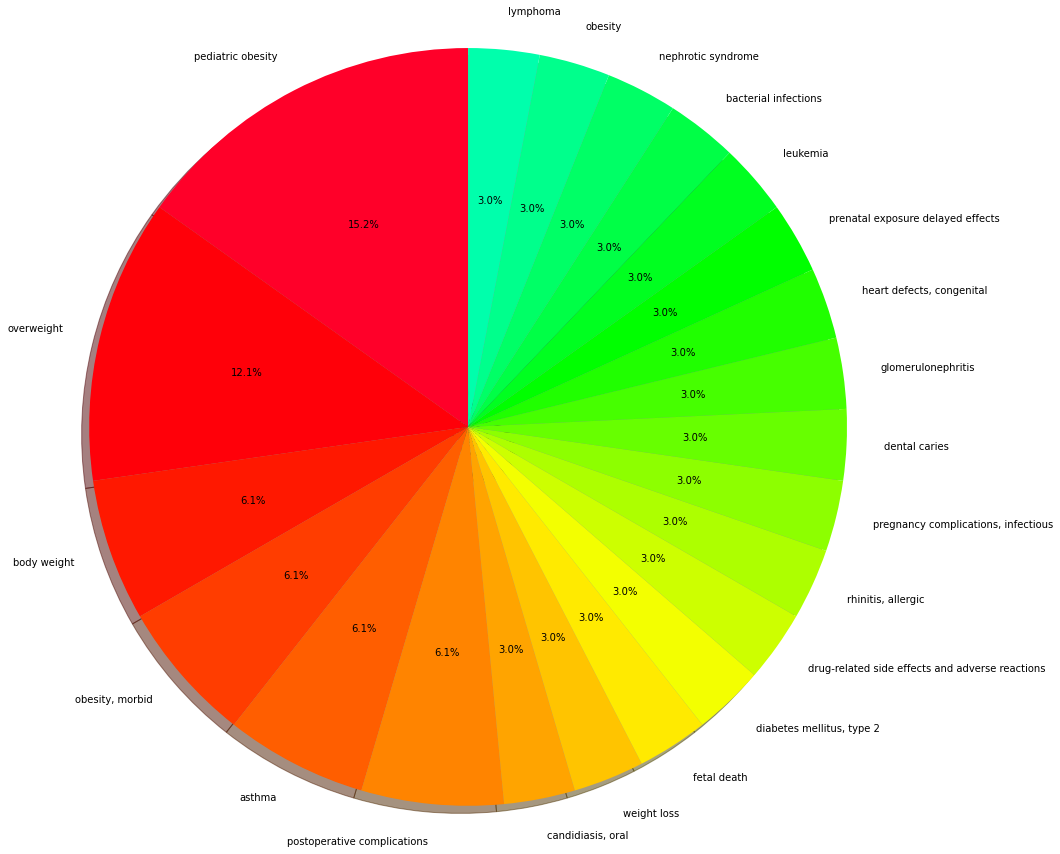

In [21]:
#Create a pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = names
sizes = sizes

cs=cm.gist_rainbow(np.arange(40)/40.)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=cs, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()